In [7]:
# Deep Learning Fundamentals: MNIST Case Study
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [1]:
import requests

# URLs of the files
data_train_features_url = 'https://www.raphaelcousin.com/modules/module7/exercise/module7_exercise_train_features.csv'
data_train_labels_url = 'https://www.raphaelcousin.com/modules/module7/exercise/module7_exercise_train_labels.csv'
data_test_features_url = 'https://www.raphaelcousin.com/modules/module7/exercise/module7_exercise_test_features.csv'
data_test_labels_url = 'https://www.raphaelcousin.com/modules/module7/exercise/module7_exercise_test_labels.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(data_train_features_url, 'module7_exercise_train_features.csv')
download_file(data_train_labels_url, 'module7_exercise_train_labels.csv')
download_file(data_test_features_url, 'module7_exercise_test_features.csv')

Downloaded module7_exercise_train_features.csv from https://www.raphaelcousin.com/modules/module7/exercise/module7_exercise_train_features.csv
Downloaded module7_exercise_train_labels.csv from https://www.raphaelcousin.com/modules/module7/exercise/module7_exercise_train_labels.csv
Downloaded module7_exercise_test_features.csv from https://www.raphaelcousin.com/modules/module7/exercise/module7_exercise_test_features.csv


In [9]:
X = pd.read_csv('module7_exercise_train_features.csv').values
y = pd.read_csv('module7_exercise_train_labels.csv').values.ravel()

In [11]:
X.shape

(60000, 784)

In [13]:
y.shape

(60000,)

In [15]:
def plot_mnist_digits(X, y, num_examples=5, figsize=(15, 3)):
    # Create figure
    fig, axes = plt.subplots(1, num_examples, figsize=figsize)
    
    # Ensure axes is always a numpy array
    if num_examples == 1:
        axes = np.array([axes])
    
    # Plot each example
    for i in range(num_examples):
        # Reshape the flattened image back to 28x28
        img = X[i].reshape(28, 28)
        
        # Plot
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Label: {y[i]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    return fig

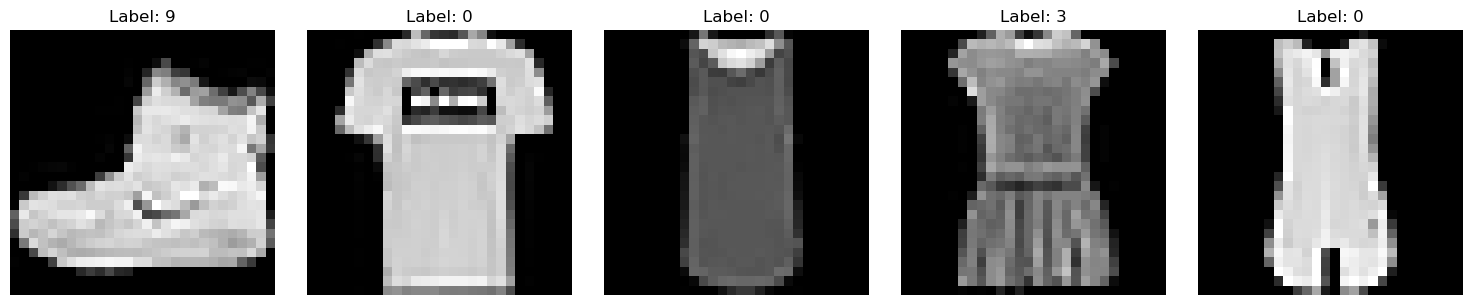

In [17]:
# Plot some examples
fig = plot_mnist_digits(X, y, num_examples=5)
plt.show()

## Data Preprocessing

In [20]:
from torch.utils.data import TensorDataset, Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler

In [38]:
def preprocess_data(X, y, batch_size=32, train_size=0.7, val_size=0.15, random_state=42):
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split data into train+val and test
    test_size = 1 - train_size - val_size
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X_scaled, y, test_size=test_size, 
        random_state=random_state, stratify=y
    )
    
    # Split train+val into train and val
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, 
        test_size=val_size/(train_size + val_size),
        random_state=random_state, stratify=y_trainval
    )
    
    # Convert to tensors and create dataloaders
    data_loader_train = DataLoader(
        TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train)),
        batch_size=batch_size, shuffle=True)
    data_loader_val = DataLoader(
        TensorDataset(torch.FloatTensor(X_val), torch.LongTensor(y_val)),
        batch_size=batch_size)
    data_loader_test = DataLoader(
        TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test)),
        batch_size=batch_size)
    
    return data_loader_train, data_loader_val, data_loader_test

## Model
### Create a simple model with right input output and define criterion and criterion/loss

In [30]:

def create_model(device):
    dropout_rate = 0.2
    model = nn.Sequential(
                # First hidden layer
                nn.Linear(784, 512),
                nn.ReLU(),
                nn.BatchNorm1d(512),
                nn.Dropout(dropout_rate),
                
                # Second hidden layer
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.BatchNorm1d(256),
                nn.Dropout(dropout_rate),
                
                # Third hidden layer
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.BatchNorm1d(128),
                nn.Dropout(dropout_rate),
                
                # Output layer
                nn.Linear(128, 10)
            ).to(device)
    
    
    # Define loss function
    criterion = nn.CrossEntropyLoss().to(device)
    
    # Define optimizer (with reasonable defaults)
    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=0.01,
        betas=(0.9, 0.999),
        eps=1e-08,
        weight_decay=0.0001
    )

    return model, criterion, optimizer

## Train

In [86]:
data_loader_train, data_loader_val, data_loader_test = preprocess_data(X, y, batch_size=32, train_size=0.7, val_size=0.15, random_state=42)
for X_batch, y_batch in data_loader_train:
    print(X_batch.size(0))

32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
3

## Train version1

In [66]:
'''
from collections import defaultdict
import torch

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device='cpu'):
    history = defaultdict(list)  # 用于记录训练和验证的损失与准确率

    for epoch in range(num_epochs):
        model.train()  # 设置模型为训练模式
        train_loss, train_correct, total_train = 0.0, 0, 0

        # 训练阶段
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # 数据迁移到设备
            optimizer.zero_grad()  
            outputs = model(X_batch)  # forward propagation
            loss = criterion(outputs, y_batch)  # calcul loss
            loss.backward()  # backwards prop
            optimizer.step()  # update param

            train_loss += loss.item() * X_batch.size(0)  # train loss weighted by batchsize
            _, preds = torch.max(outputs, 1)  # get prediction
            train_correct += (preds == y_batch).sum().item()  # 累积正确预测样本数
            total_train += y_batch.size(0)  

        train_loss /= total_train  # 平均训练损失
        train_acc = train_correct / total_train  # 训练准确率

        # 验证阶段
        model.eval()  # 设置模型为评估模式
        val_loss, val_correct, total_val = 0.0, 0, 0
        with torch.no_grad():#评估阶段不需要反向传播，因此不需要计算图，用no grad（）禁用计算图，节省内存
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == y_batch).sum().item()
                total_val += y_batch.size(0)

        val_loss /= total_val  # 平均验证损失
        val_acc = val_correct / total_val  # 验证准确率

        # 记录历史
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        # 打印每个 epoch 的结果
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}\n")

    return history
'''

## Train version2 avec early stopping

In [90]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0, path='checkpoint.pt'):
        self.patience = patience
        self.min_delta = min_delta
        self.path = path
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.val_loss_min = np.inf

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_loss + self.min_delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [92]:
from collections import defaultdict
import torch

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, patience=7, device='cpu',checkpoint_path='checkpoint.pt'):
    early_stopping = EarlyStopping(patience=patience, path=checkpoint_path)
    history = defaultdict(list)  # 用于记录训练和验证的损失与准确率

    for epoch in range(num_epochs):
        model.train()  # 设置模型为训练模式
        train_loss, train_correct, total_train = 0.0, 0, 0

        # 训练阶段
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # 数据迁移到设备
            optimizer.zero_grad()  
            outputs = model(X_batch)  # forward propagation
            loss = criterion(outputs, y_batch)  # calcul loss
            loss.backward()  # backwards prop
            optimizer.step()  # update param

            train_loss += loss.item() * X_batch.size(0)  # train loss weighted by batchsize
            _, preds = torch.max(outputs, 1)  # get prediction
            train_correct += (preds == y_batch).sum().item()  # 累积正确预测样本数
            total_train += y_batch.size(0)  

        train_loss /= total_train  # 平均训练损失
        train_acc = train_correct / total_train  # 训练准确率

        # 验证阶段
        model.eval()  # 设置模型为评估模式
        val_loss, val_correct, total_val = 0.0, 0, 0
        with torch.no_grad():#评估阶段不需要反向传播，因此不需要计算图，用no grad（）禁用计算图，节省内存
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == y_batch).sum().item()
                total_val += y_batch.size(0)

        val_loss /= total_val  # 平均验证损失
        val_acc = val_correct / total_val  # 验证准确率

        # 记录历史
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        # 打印每个 epoch 的结果
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}\n")
        
        # Early stopping check
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered. recharge le meilleur modele.")
            model.load_state_dict(torch.load(checkpoint_path, map_location=device))
            break
        
    return history

In [94]:
# Set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# Create model and training components
model, criterion, optimizer = create_model(device)

# Train the model
history = train_model(
    model=model,
    train_loader=data_loader_train,
    val_loader=data_loader_val,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=10,
    device=device
)

Epoch 1/10
Train Loss: 0.6306, Train Acc: 0.7757
Val Loss: 0.5146, Val Acc: 0.8170

Validation loss decreased (inf --> 0.514571). Saving model ...
Epoch 2/10
Train Loss: 0.5648, Train Acc: 0.8018
Val Loss: 0.5396, Val Acc: 0.8066

EarlyStopping counter: 1 out of 7
Epoch 3/10
Train Loss: 0.5550, Train Acc: 0.8031
Val Loss: 0.4665, Val Acc: 0.8298

Validation loss decreased (0.514571 --> 0.466457). Saving model ...
Epoch 4/10
Train Loss: 0.5448, Train Acc: 0.8100
Val Loss: 0.4735, Val Acc: 0.8301

EarlyStopping counter: 1 out of 7
Epoch 5/10
Train Loss: 0.5331, Train Acc: 0.8110
Val Loss: 0.4556, Val Acc: 0.8327

Validation loss decreased (0.466457 --> 0.455649). Saving model ...
Epoch 6/10
Train Loss: 0.5332, Train Acc: 0.8135
Val Loss: 0.4744, Val Acc: 0.8344

EarlyStopping counter: 1 out of 7
Epoch 7/10
Train Loss: 0.5274, Train Acc: 0.8148
Val Loss: 0.4711, Val Acc: 0.8352

EarlyStopping counter: 2 out of 7
Epoch 8/10
Train Loss: 0.5227, Train Acc: 0.8182
Val Loss: 0.4491, Val Acc: 0

In [96]:
def plot_training_history(history):
    """
    Plot training history
    
    Parameters:
    -----------
    history : dict
        Training history containing metrics
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    # Plot loss
    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Val Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Plot accuracy
    ax2.plot(history['train_acc'], label='Train Acc')
    ax2.plot(history['val_acc'], label='Val Acc')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    return fig

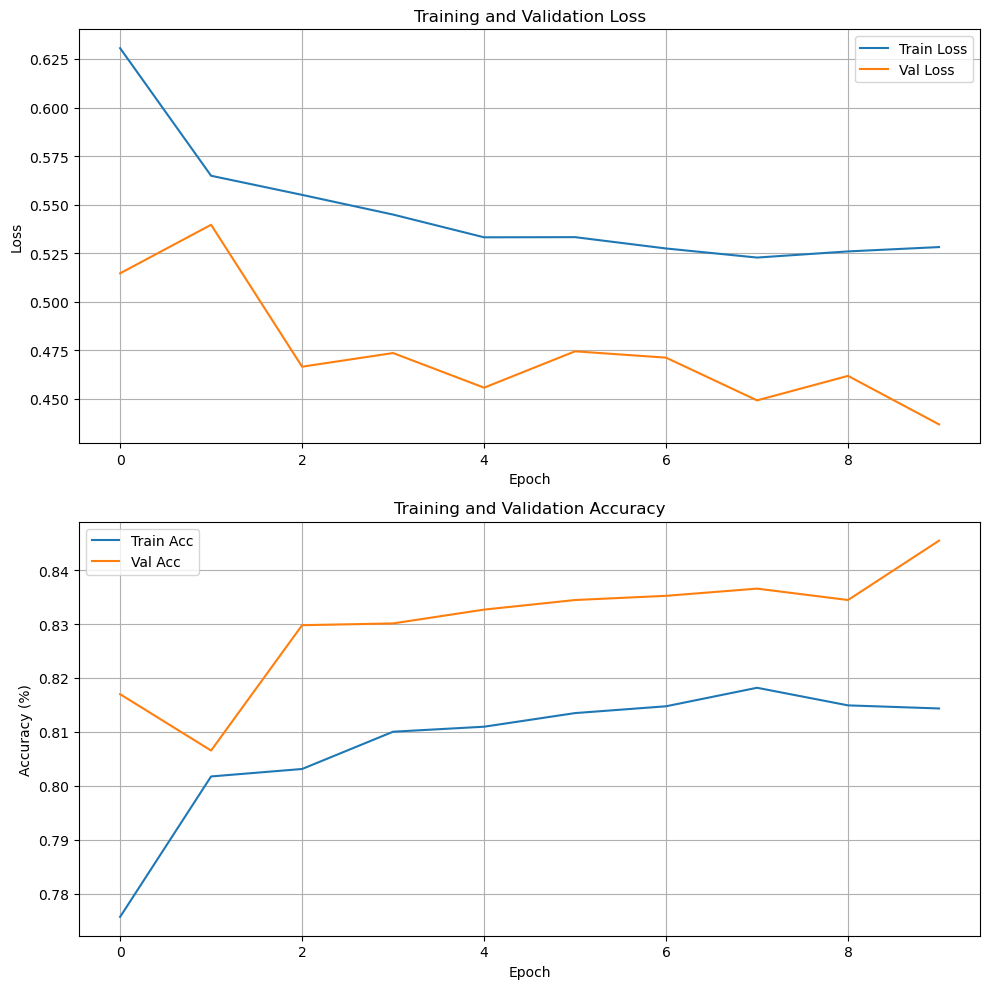

In [98]:
# Plot training history
plot_training_history(history)
plt.show()

## Generating Submission File

In [119]:
X_test = pd.read_csv('module7_exercise_test_features.csv').values
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
X_test_tensor = X_test_tensor.to(device)

In [123]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(X_test_tensor)
_, predictions = torch.max(outputs, 1)

In [125]:
predictions = predictions.cpu().numpy()#让张量从gpu回到cpu并变成numpy数组以进行df操作，numpy只能处理cpu张量
submission = pd.DataFrame({
    'label': predictions # your_prediction
}, index=range(len(predictions)))

submission.to_csv('submission.csv', index=False, sep=',')
submission.head()

,label
0,9
1,2
2,1
3,1
4,6
